In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display

In [10]:
df = pd.read_csv("meth_counts/GSE153594_Methylation_Counts.csv", sep=",", decimal=".",
                 dtype={"Chr": str, "Start": int, "End": int, "NZM9": float})

df = df[["Chr", "Start", "End", "NZM9"]]

display(df.head())

,Chr,Start,End,NZM9
0,1,10003038,10003165,5.376344
1,1,10003166,10003208,3.472222
2,1,10003232,10003297,1.980198
3,1,10003298,10003339,24.719101
4,1,10003340,10003434,3.851641


In [11]:
df['Chr'] = 'chr' + df['Chr'].astype(str)
df_vh = df[df.NZM9 > 75]
df_hi = df[(df.NZM9 < 75) & (df.NZM9 > 50)]
df_me = df[(df.NZM9 < 50) & (df.NZM9 > 25)]
df_lw = df[(df.NZM9 < 25)]

del df_vh["NZM9"]
del df_hi["NZM9"]
del df_me["NZM9"]
del df_lw["NZM9"]

In [12]:
df_vh.to_csv("bed_files/vh_meth.bed", header=None, index=None, sep="\t")
df_hi.to_csv("bed_files/hi_meth.bed", header=None, index=None, sep="\t")
df_me.to_csv("bed_files/me_meth.bed", header=None, index=None, sep="\t")
df_lw.to_csv("bed_files/lw_meth.bed", header=None, index=None, sep="\t")

In [13]:
root = 'annotated_files/'
files = ['vh_annotated.txt', 'hi_annotated.txt', 'me_annotated.txt', 'lw_annotated.txt']
meth_types = ['very_high', 'high', 'medium', 'low']

def get_label(raw_label):
    return raw_label.split('(')[0]


dfs = [pd.read_csv(root + f, sep='\t') for f in files]
for i, df in enumerate(dfs):
    df['Meth type'] = [meth_types[i]] * len(df)
    df['Label'] = df['Annotation'].apply(lambda x: get_label(x))
    
df = pd.concat(dfs, axis='index')
df.to_csv("annotated_files/all_annotated.csv", sep="\t")

display(df.head(20))

,PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,Meth type,Label
0,81541,chr20,47267635,47267690,+,0,NaN,"intron (NM_020820, intron 22 of 39)","-intron (NM_020820, intron 22 of 39)",176758,...,PREX1,NM_020820,NaN,NaN,PREX1,NaN,NaN,NaN,very_high,intron
1,57846,chr17,982170,982227,+,0,NaN,"intron (NM_021962, intron 6 of 22)","-intron (NM_001092, intron 5 of 21)",30126,...,ABR,NM_001159746,NaN,NaN,ABR,NaN,NaN,NaN,very_high,intron
2,59977,chr19,1015760,1015912,+,0,NaN,"intron (NM_033420, intron 1 of 9)","-intron (NM_001033026, intron 1 of 10)",5305,...,C19orf6,NM_033420,NaN,NaN,C19orf6,NaN,NaN,NaN,very_high,intron
3,28361,chr12,6341735,6341819,+,0,NaN,"intron (NM_001769, intron 2 of 7)","-intron (NM_001769, intron 2 of 7)",32295,...,CD9,NM_001769,NaN,NaN,CD9,NaN,NaN,NaN,very_high,intron
4,107811,chr6,133562640,133562679,+,0,NaN,"exon (NM_004100, exon 1 of 20)","-exon (NM_004100, exon 1 of 20)",164,...,EYA4,NM_172103,NaN,NaN,EYA4,NaN,NaN,NaN,very_high,exon
5,127389,chr9,135012600,135012712,+,0,NaN,Intergenic,Intergenic,-24678,...,NTNG2,NM_032536,NaN,NaN,NTNG2,NaN,NaN,NaN,very_high,Intergenic
6,36459,chr15,23261898,23262063,+,0,NaN,"exon (NR_024074, exon 11 of 12)","-exon (NR_024074, exon 11 of 12)",6738,...,GOLGA8IP,NR_024074,NaN,NaN,GOLGA8IP,NaN,NaN,NaN,very_high,exon
7,6323,chr1,235815760,235815864,+,0,NaN,Intergenic,Intergenic,-1758,...,GNG4,NM_004485,NaN,NaN,GNG4,NaN,NaN,NaN,very_high,Intergenic
8,29813,chr13,112997467,112997550,+,0,NaN,Intergenic,Intergenic,-33143,...,SPACA7,NM_145248,NaN,NaN,SPACA7,NaN,NaN,NaN,very_high,Intergenic
9,105067,chr5,34770201,34770276,+,0,NaN,"intron (NM_015577, intron 3 of 17)","-intron (NM_001145520, intron 3 of 17)",-69031,...,TTC23L,NM_144725,NaN,NaN,TTC23L,NaN,NaN,NaN,very_high,intron


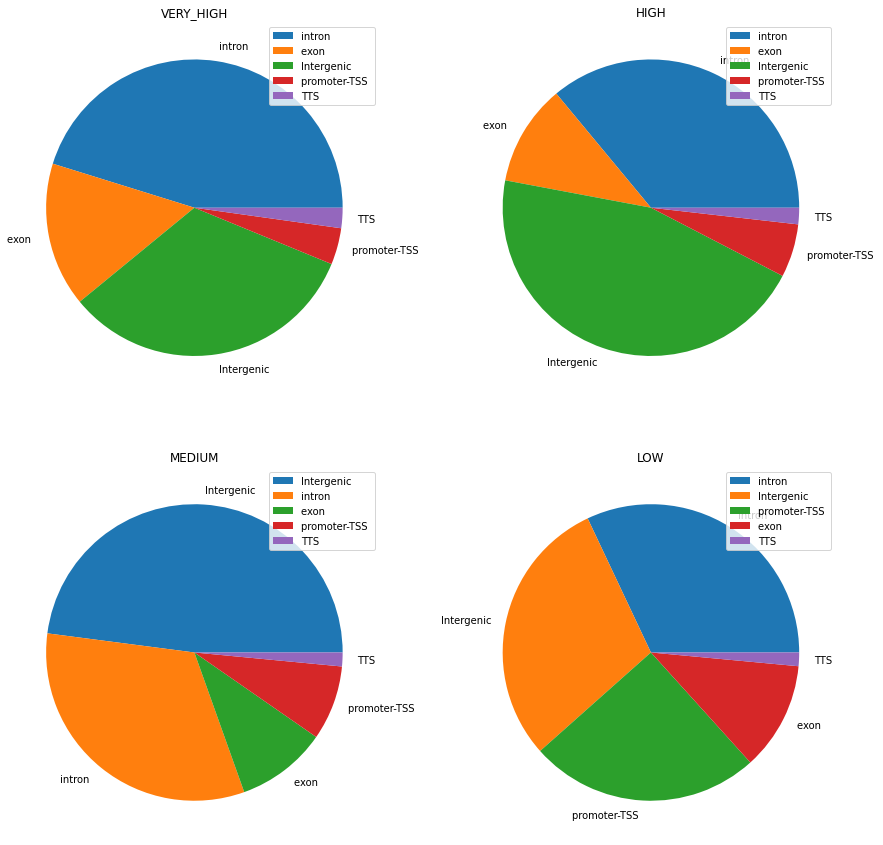

In [14]:
f, axs = plt.subplots(2, 2, figsize=(15,15))

for i, mtype in enumerate(meth_types):
    counter = Counter(df[df['Meth type'] == mtype]['Label'])
    plt.subplot(2, 2, i + 1)
    plt.pie(counter.values(), labels=counter.keys())
    plt.title(mtype.upper())
    plt.legend()
    plt.plot()
    
plt.show()